In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Pre-Processing

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
df.duplicated().sum()

3008

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11991, 10)

In [ ]:
left=df[df.left==1]
left.shape

(1991, 10)

In [ ]:
retained=df[df.left==0]
retained.shape

(10000, 10)

In [ ]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


<Axes: xlabel='salary'>

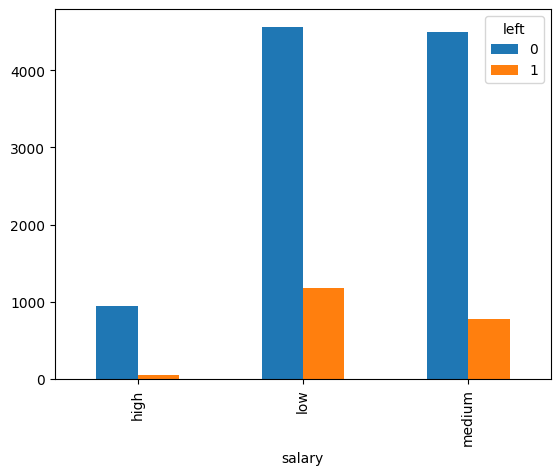

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Employees with high salaries are likely to not leave the company

<Axes: xlabel='Department'>

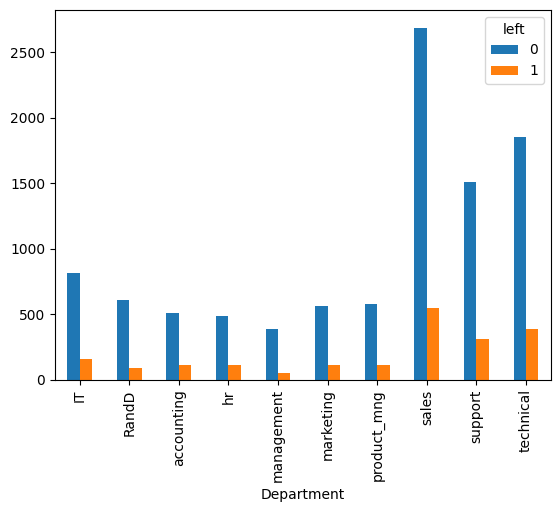

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
newdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
newdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
11995,0.90,259,1,high
11996,0.74,266,1,high
11997,0.85,185,1,high
11998,0.33,172,1,high


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

In [ ]:
newdf['salary']=LE.fit_transform(newdf['salary'])
newdf

In [ ]:
X=newdf
X.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [ ]:
y=df.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
1851,0.46,147,0,1
5250,0.86,235,0,2
4163,0.63,242,0,0
11870,0.86,273,0,2
7795,0.83,272,0,2
...,...,...,...,...
7285,0.62,147,0,1
1956,0.40,155,0,1
517,0.09,309,0,1
10476,0.92,198,0,2


In [ ]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
4855,0.92,196,0,2
5097,0.53,246,0,0
4733,0.56,191,1,2
11575,0.49,192,0,0
2139,0.71,172,0,0
...,...,...,...,...
4869,0.71,198,0,1
10815,0.83,247,0,2
5528,0.79,222,1,0
2345,0.95,183,0,1


**Building Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Acuracy: ",model.score(X_test,y_test)*100)

Acuracy:  86.70279283034597
